In [2]:
import os 
import numpy as np
import qim3d
import dask.array as da
from skimage.transform import downscale_local_mean
from utils.utils_txm import load_txm
from utils.utils_image import load_image
from utils.utils_preprocess import rescale, clip_percentile


In [2]:

base_path = "/dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/"
scan_path = "Oak_A_bin1x1_4X_80kV_7W_air_1p5_1p67mu_bin1_pos1_Stitch.txm" 
file_path = os.path.join(base_path, scan_path)

img1, meta1 = load_txm(file_path)

scale2 = downscale_local_mean(img1, (2, 2, 2))
scale4 = downscale_local_mean(scale2, (2, 2, 2))
scale8 = downscale_local_mean(scale4, (2, 2, 2))
scale16 = downscale_local_mean(scale8, (2, 2, 2))

out_path = file_path.replace(".txm", "_scale_8.tif")
qim3d.io.save(out_path, scale8, progress_bar=True, dtype=np.float32)

out_path = file_path.replace(".txm", "_scale_16.tif")
qim3d.io.save(out_path, scale16, progress_bar=True, dtype=np.float32)


spefile module not found
netCDF4 module not found
EdfFile module not found
astropy module not found


Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/Oak_A_bin1x1_4X_80kV_7W_air_1p5_1p67mu_bin1_pos1_Stitch.txm
txm shape: (5459, 2017, 1979)


In [4]:

base_path = "/work2/aulho"
scan_path = "Oak_A_bin1x1_LFOV_retake_LFOV_80kV_7W_air_2p5s_6p6mu_bin1_pos1_Stitch.txm"
file_path = os.path.join(base_path, scan_path)

img2, meta2 = load_txm(file_path)

scale2 = downscale_local_mean(img2, (2, 2, 2))
scale4 = downscale_local_mean(scale2, (2, 2, 2))
scale8 = downscale_local_mean(scale4, (2, 2, 2))
scale16 = downscale_local_mean(scale8, (2, 2, 2))

out_path = file_path.replace(".txm", "_scale_8.tif")
qim3d.io.save(out_path, scale4, progress_bar=True, dtype=np.float32)

out_path = file_path.replace(".txm", "_scale_16.tif")
qim3d.io.save(out_path, scale16, progress_bar=True, dtype=np.float32)


Reading input file: /work2/aulho/Oak_A_bin1x1_LFOV_retake_LFOV_80kV_7W_air_2p5s_6p6mu_bin1_pos1_Stitch.txm
txm shape: (3236, 2046, 2008)


In [16]:
base_path = "/dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/"
scan_path = "Oak_A_bin1x1_4X_80kV_7W_air_1p5_1p67mu_bin1_pos1_Stitch.txm" 
file_path = os.path.join(base_path, scan_path)

img1, meta1 = load_txm(file_path)
img1_crop = img1[0:500, :, :]

img1_crop.shape
img1.dtype
out_path = file_path.replace(".txm", "_cropped.tif")
qim3d.io.save(out_path, img1_crop, progress_bar=True, dtype=np.uint16, replace=True)

Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/Oak_A_bin1x1_4X_80kV_7W_air_1p5_1p67mu_bin1_pos1_Stitch.txm
txm shape: (5459, 2017, 1979)


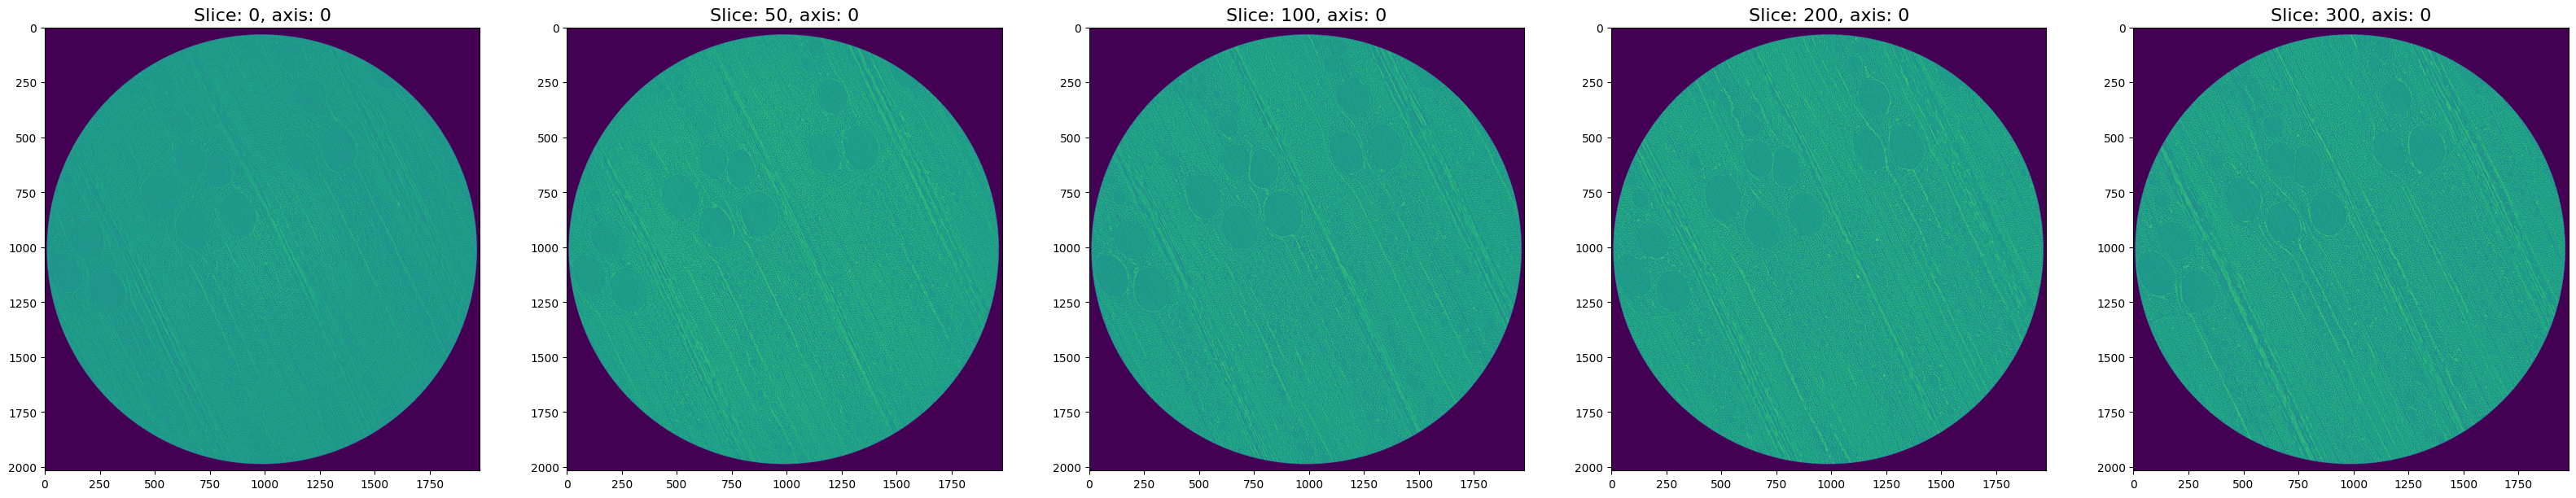

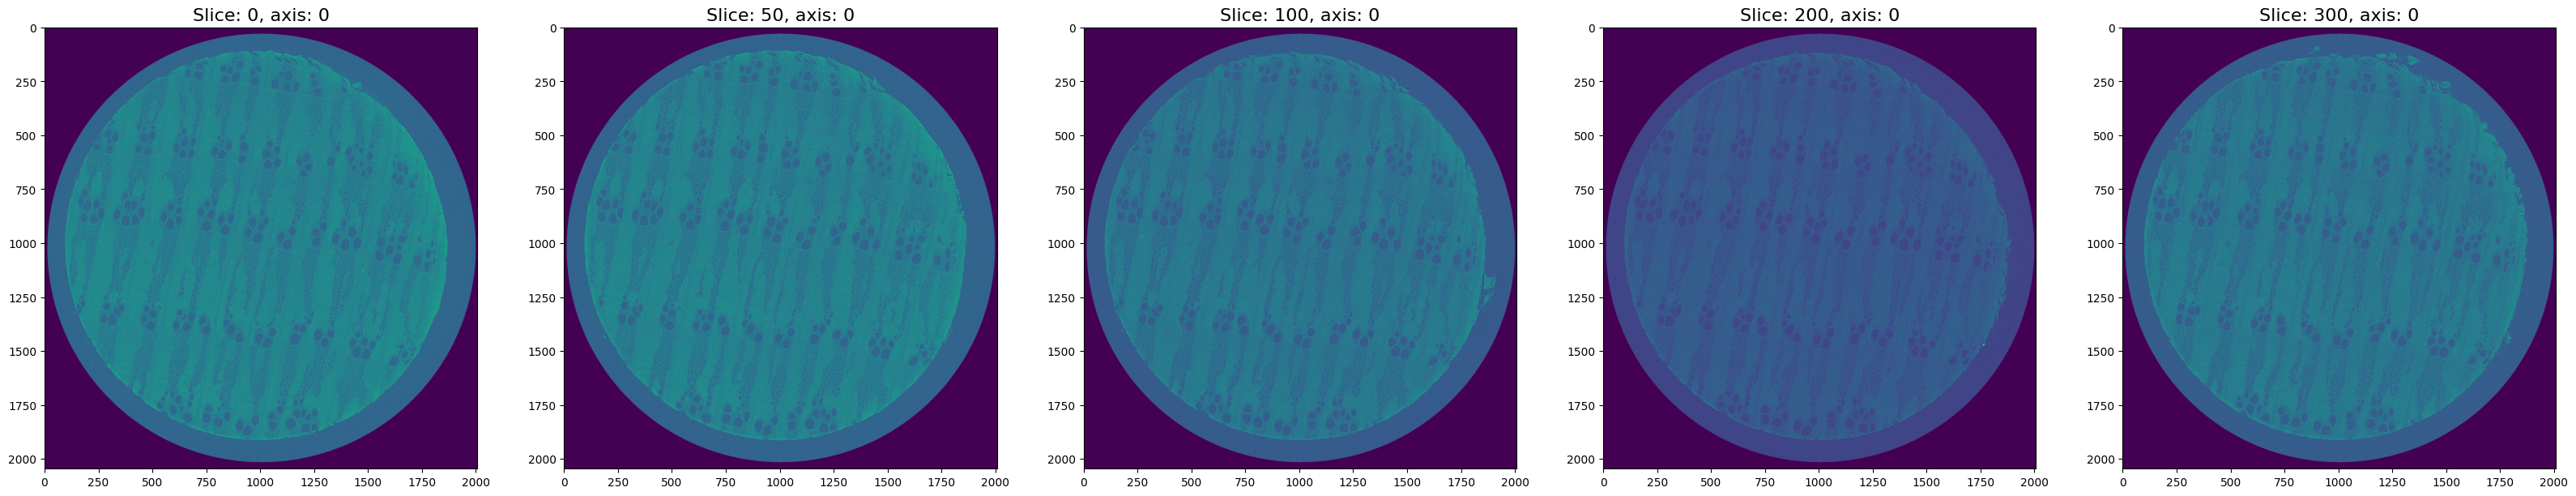

In [20]:
from utils.utils_plot import viz_slices
viz_slices(img1_crop, [0, 50, 100, 200, 300], savefig=False)

from utils.utils_plot import viz_slices
viz_slices(img2_crop, [0, 50, 100, 200, 300], savefig=False)

In [19]:
base_path = "/work2/aulho"
scan_path = "Oak_A_bin1x1_LFOV_retake_LFOV_80kV_7W_air_2p5s_6p6mu_bin1_pos1_Stitch.txm"
file_path = os.path.join(base_path, scan_path)

img2, meta2 = load_txm(file_path)
img2_crop = img2[250:1250, :, :]

img2_crop.shape
img2.dtype
out_path = file_path.replace(".txm", "_cropped.tif")
qim3d.io.save(out_path, img2_crop, progress_bar=True, dtype=np.uint16, replace=True)

Reading input file: /work2/aulho/Oak_A_bin1x1_LFOV_retake_LFOV_80kV_7W_air_2p5s_6p6mu_bin1_pos1_Stitch.txm
txm shape: (3236, 2046, 2008)


In [4]:
base_path = "/dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/"

scan_paths = []
scan_paths.append("Vertebrae_A_80kV/Vertebrae_A_4x_80kV_bin1_cropped.tif")
scan_paths.append("Vertebrae_B_80kV/Vertebrae_B_4x_80kV_bin1_cropped.tif")
scan_paths.append("Vertebrae_C_80kV/Vertebrae_C_4x_80kV_bin2_cropped.tif")
scan_paths.append("Vertebrae_D_80kV/Vertebrae_D_4x_80kV_bin1_cropped.tif")

for scan_path in scan_paths:
    file_path = os.path.join(base_path, scan_path)

    img = load_image(file_path, dtype=np.float32)
    
    scale2 = downscale_local_mean(img, (2, 2, 2))
    print("scale 2 shape:", scale2.shape)
    scale4 = downscale_local_mean(scale2, (2, 2, 2))
    print("scale 4 shape:", scale4.shape)
    scale8 = downscale_local_mean(scale4, (2, 2, 2))
    print("scale 8 shape:", scale8.shape)
    scale16 = downscale_local_mean(scale8, (2, 2, 2))
    print("scale 16 shape:", scale16.shape)

    #scale2 = rescale(scale2)
    #scale2 = clip_percentile(scale2, lower=1.0, upper=99.0, mode='rescale')
    #out_path = file_path.replace(".tif", "_scale_2.npy")
    #scale2 = (scale2 * 255).astype(np.uint8)
    #np.save(out_path, scale2)
    
    scale4 = rescale(scale4)
    scale4 = clip_percentile(scale4, lower=1.0, upper=99.0, mode='rescale')
    out_path = file_path.replace(".tif", "_scale_4.npy")
    scale4 = (scale4 * 255).astype(np.uint8)
    np.save(out_path, scale4)
    
    scale8 = rescale(scale8)
    scale8 = clip_percentile(scale8, lower=1.0, upper=99.0, mode='rescale')
    out_path = file_path.replace(".tif", "_scale_8.npy")
    scale8 = (scale8 * 255).astype(np.uint8)
    np.save(out_path, scale8)
    
    #scale16 = rescale(scale16)
    #out_path = file_path.replace(".tif", "_scale_16.npy")
    #scale16 = (scale16 * 255).astype(np.uint8)
    #np.save(out_path, scale16)

Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/Vertebrae_A_80kV/Vertebrae_A_4x_80kV_bin1_cropped.tif
tiff shape: (1992, 1636, 1910)
scale 2 shape: (996, 818, 955)
scale 4 shape: (498, 409, 478)
scale 8 shape: (249, 205, 239)
scale 16 shape: (125, 103, 120)
Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/Vertebrae_B_80kV/Vertebrae_B_4x_80kV_bin1_cropped.tif
tiff shape: (1992, 1903, 1558)
scale 2 shape: (996, 952, 779)
scale 4 shape: (498, 476, 390)
scale 8 shape: (249, 238, 195)
scale 16 shape: (125, 119, 98)
Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/Vertebrae_C_80kV/Vertebrae_C_4x_80kV_bin2_cropped.tif
tiff shape: (1992, 1616, 1910)
scale 2 shape: (996, 808, 955)
scale 4 shape: (498, 404, 478)
scale 8 shape: (249, 202, 239)
scale 16 shape: (125, 101, 120)
Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern

In [5]:
base_path = "/dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/"

scan_paths = []
scan_paths.append("Vertebrae_A_80kV/Vertebrae_A_80kV_cropped.tif")
scan_paths.append("Vertebrae_B_80kV/Vertebrae_B_80kV_cropped.tif")
scan_paths.append("Vertebrae_C_80kV/Vertebrae_C_80kV_cropped.tif")
scan_paths.append("Vertebrae_D_80kV/Vertebrae_D_80kV_cropped.tif")

for scan_path in scan_paths:
    file_path = os.path.join(base_path, scan_path)

    img = load_image(file_path, dtype=np.float32)
    
    scale2 = downscale_local_mean(img, (2, 2, 2))
    print("scale 2 shape:", scale2.shape)
    scale4 = downscale_local_mean(scale2, (2, 2, 2))
    print("scale 4 shape:", scale4.shape)
    scale8 = downscale_local_mean(scale4, (2, 2, 2))

    scale2 = rescale(scale2)
    scale2 = clip_percentile(scale2, lower=1.0, upper=99.0, mode='rescale')
    out_path = file_path.replace(".tif", "_scale_2.npy")
    scale2 = (scale2 * 255).astype(np.uint8)
    np.save(out_path, scale2)
    
    scale4 = rescale(scale4)
    scale4 = clip_percentile(scale4, lower=1.0, upper=99.0, mode='rescale')
    out_path = file_path.replace(".tif", "_scale_4.npy")
    scale4 = (scale4 * 255).astype(np.uint8)
    np.save(out_path, scale4)
    


Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/Vertebrae_A_80kV/Vertebrae_A_80kV_cropped.tif
tiff shape: (800, 1000, 682)
scale 2 shape: (400, 500, 341)
scale 4 shape: (200, 250, 171)
Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/Vertebrae_B_80kV/Vertebrae_B_80kV_cropped.tif
tiff shape: (880, 896, 733)
scale 2 shape: (440, 448, 367)
scale 4 shape: (220, 224, 184)
Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/Vertebrae_C_80kV/Vertebrae_C_80kV_cropped.tif
tiff shape: (940, 694, 854)
scale 2 shape: (470, 347, 427)
scale 4 shape: (235, 174, 214)
Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/Vertebrae_D_80kV/Vertebrae_D_80kV_cropped.tif
tiff shape: (840, 671, 964)
scale 2 shape: (420, 336, 482)
scale 4 shape: (210, 168, 241)


In [3]:
base_path = "/dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/"

scan_paths = []
scan_paths.append("Femur_01_80kV/Femur_01_80kV_100W_cropped.tif")
scan_paths.append("Femur_15_80kV/Femur_15_80kV_100W_cropped.tif")
scan_paths.append("Femur_21_80kV/Femur_21_80kV_100W_cropped.tif")
scan_paths.append("Femur_74_80kV/Femur_74_80kV_100W_cropped.tif")

for scan_path in scan_paths:
    file_path = os.path.join(base_path, scan_path)

    img = load_image(file_path, dtype=np.float32)
    
    scale2 = downscale_local_mean(img, (2, 2, 2))
    print("scale 2 shape:", scale2.shape)

    scale2 = rescale(scale2)
    #scale2 = clip_percentile(scale2, lower=1.0, upper=99.0, mode='rescale')
    out_path = file_path.replace(".tif", "_scale_2.npy")
    scale2 = (scale2 * 255).astype(np.uint8)
    np.save(out_path, scale2)



Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/Femur_01_80kV/Femur_01_80kV_100W_cropped.tif
tiff shape: (600, 600, 600)
scale 2 shape: (300, 300, 300)
Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/Femur_15_80kV/Femur_15_80kV_100W_cropped.tif
tiff shape: (600, 600, 600)
scale 2 shape: (300, 300, 300)
Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/Femur_21_80kV/Femur_21_80kV_100W_cropped.tif
tiff shape: (600, 600, 600)
scale 2 shape: (300, 300, 300)
Reading input file: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/Femur_74_80kV/Femur_74_80kV_100W_cropped.tif
tiff shape: (600, 600, 600)
scale 2 shape: (300, 300, 300)
